In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df=pd.read_csv("train.csv")
df.head()



,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


You can download the dataset from https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

In [2]:
df.shape

(1460, 81)

In [3]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

#### Removing features with large missing values

In [5]:
features_with_na = [features for features in df.columns if df[features].isnull().sum()>1]

for feature in features_with_na:
    print(feature,'has', df[feature].isnull().sum(),'missing values')


LotFrontage has 259 missing values
Alley has 1369 missing values
MasVnrType has 8 missing values
MasVnrArea has 8 missing values
BsmtQual has 37 missing values
BsmtCond has 37 missing values
BsmtExposure has 38 missing values
BsmtFinType1 has 37 missing values
BsmtFinType2 has 38 missing values
FireplaceQu has 690 missing values
GarageType has 81 missing values
GarageYrBlt has 81 missing values
GarageFinish has 81 missing values
GarageQual has 81 missing values
GarageCond has 81 missing values
PoolQC has 1453 missing values
Fence has 1179 missing values
MiscFeature has 1406 missing values


In [6]:
columns_to_be_removed = [columns for columns in features_with_na if df[columns].isnull().sum() >250]
columns_to_be_removed

['LotFrontage', 'Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']

In [7]:
data =df.copy()

In [8]:
data.drop(columns=columns_to_be_removed,inplace=True)

#### checking the number of missing values

In [9]:
features_with_na = [features for features in data.columns if data[features].isnull().sum()>1]

for feature in features_with_na:
    print(feature,'has', data[feature].isnull().sum(),'missing values')


MasVnrType has 8 missing values
MasVnrArea has 8 missing values
BsmtQual has 37 missing values
BsmtCond has 37 missing values
BsmtExposure has 38 missing values
BsmtFinType1 has 37 missing values
BsmtFinType2 has 38 missing values
GarageType has 81 missing values
GarageYrBlt has 81 missing values
GarageFinish has 81 missing values
GarageQual has 81 missing values
GarageCond has 81 missing values


#### Analysing the correlation

<AxesSubplot:>

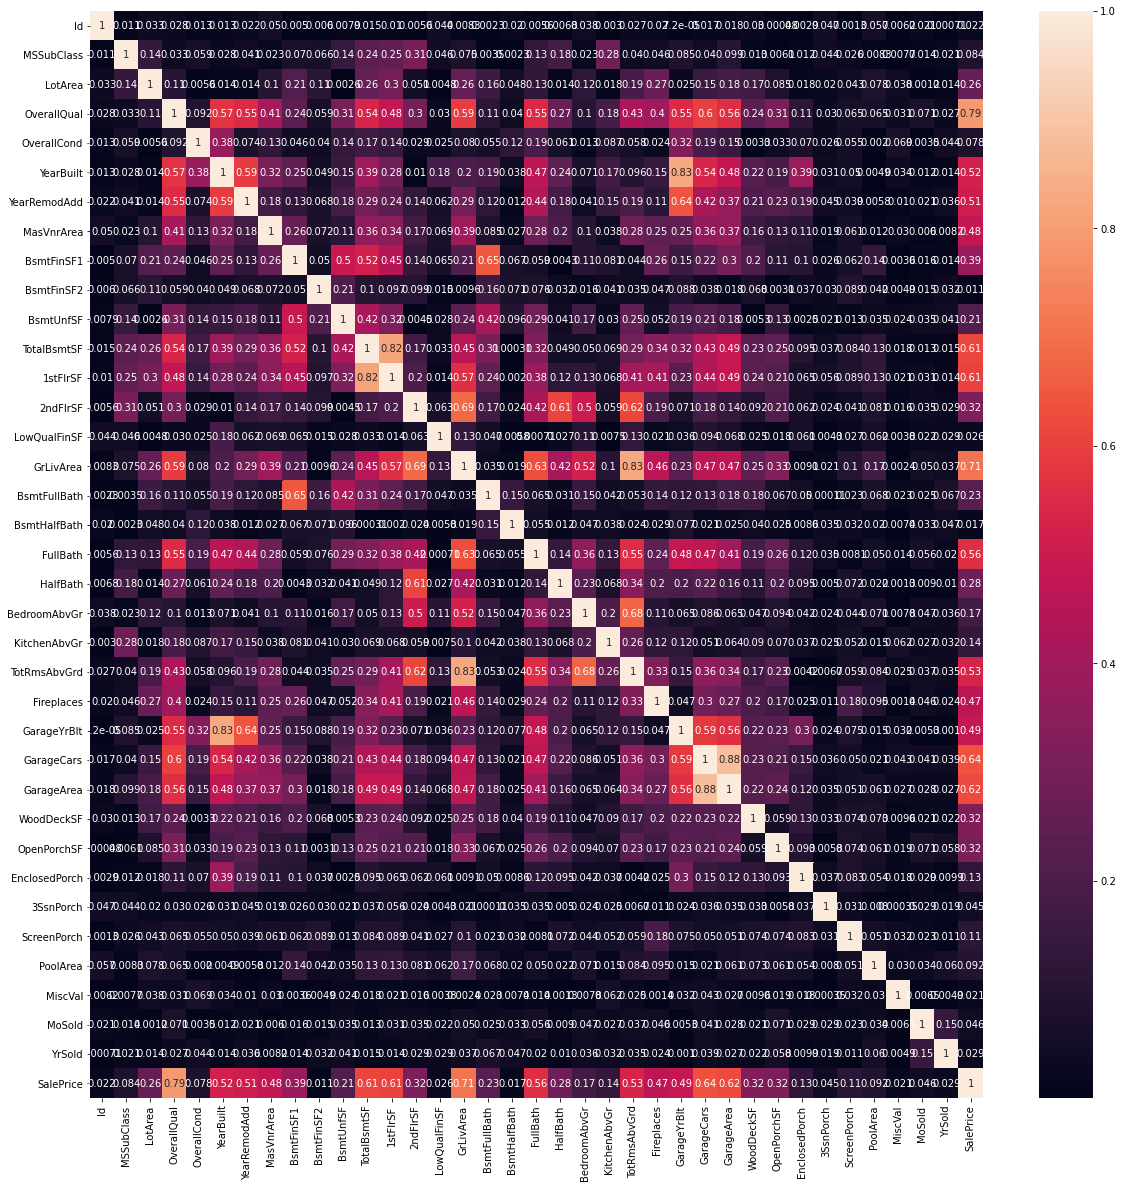

In [10]:
correlationmatrix = data.corr().abs()
plt.subplots(figsize=(20,20))
sns.heatmap(correlationmatrix, annot = True)

In [11]:
correlation=data.corr()['SalePrice'].abs().sort_values(ascending = False)[:15]
correlation

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Fireplaces      0.466929
BsmtFinSF1      0.386420
Name: SalePrice, dtype: float64

In [12]:
valuable_features = correlation.index.tolist()
data = data[valuable_features]
data

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,GarageYrBlt,MasVnrArea,Fireplaces,BsmtFinSF1
0,208500,7,1710,2,548,856,856,2,8,2003,2003,2003.0,196.0,0,706
1,181500,6,1262,2,460,1262,1262,2,6,1976,1976,1976.0,0.0,1,978
2,223500,7,1786,2,608,920,920,2,6,2001,2002,2001.0,162.0,1,486
3,140000,7,1717,3,642,756,961,1,7,1915,1970,1998.0,0.0,1,216
4,250000,8,2198,3,836,1145,1145,2,9,2000,2000,2000.0,350.0,1,655
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,175000,6,1647,2,460,953,953,2,7,1999,2000,1999.0,0.0,1,0
1456,210000,6,2073,2,500,1542,2073,2,7,1978,1988,1978.0,119.0,2,790
1457,266500,7,2340,1,252,1152,1188,2,9,1941,2006,1941.0,0.0,2,275
1458,142125,5,1078,1,240,1078,1078,1,5,1950,1996,1950.0,0.0,0,49


In [13]:
for feature in valuable_features:
    print('The feature is {} and number of unique values are {}'.format(feature,len(data[feature].unique())))

The feature is SalePrice and number of unique values are 663
The feature is OverallQual and number of unique values are 10
The feature is GrLivArea and number of unique values are 861
The feature is GarageCars and number of unique values are 5
The feature is GarageArea and number of unique values are 441
The feature is TotalBsmtSF and number of unique values are 721
The feature is 1stFlrSF and number of unique values are 753
The feature is FullBath and number of unique values are 4
The feature is TotRmsAbvGrd and number of unique values are 12
The feature is YearBuilt and number of unique values are 112
The feature is YearRemodAdd and number of unique values are 61
The feature is GarageYrBlt and number of unique values are 98
The feature is MasVnrArea and number of unique values are 328
The feature is Fireplaces and number of unique values are 4
The feature is BsmtFinSF1 and number of unique values are 637


#### Now we deal with missing values

In [14]:
for feature in valuable_features:
    print(feature,'has', data[feature].isnull().sum(),'missing values')

SalePrice has 0 missing values
OverallQual has 0 missing values
GrLivArea has 0 missing values
GarageCars has 0 missing values
GarageArea has 0 missing values
TotalBsmtSF has 0 missing values
1stFlrSF has 0 missing values
FullBath has 0 missing values
TotRmsAbvGrd has 0 missing values
YearBuilt has 0 missing values
YearRemodAdd has 0 missing values
GarageYrBlt has 81 missing values
MasVnrArea has 8 missing values
Fireplaces has 0 missing values
BsmtFinSF1 has 0 missing values


In [15]:
data.drop(['GarageYrBlt'], axis=1,inplace=True)
data['MasVnrArea'].fillna(data['MasVnrArea'].mean(),inplace=True)

In [16]:
nullvalue = data.isnull().any()
nullvalue

SalePrice       False
OverallQual     False
GrLivArea       False
GarageCars      False
GarageArea      False
TotalBsmtSF     False
1stFlrSF        False
FullBath        False
TotRmsAbvGrd    False
YearBuilt       False
YearRemodAdd    False
MasVnrArea      False
Fireplaces      False
BsmtFinSF1      False
dtype: bool

In [17]:
final_features = nullvalue.index.tolist()
data = data[final_features]
data

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,MasVnrArea,Fireplaces,BsmtFinSF1
0,208500,7,1710,2,548,856,856,2,8,2003,2003,196.0,0,706
1,181500,6,1262,2,460,1262,1262,2,6,1976,1976,0.0,1,978
2,223500,7,1786,2,608,920,920,2,6,2001,2002,162.0,1,486
3,140000,7,1717,3,642,756,961,1,7,1915,1970,0.0,1,216
4,250000,8,2198,3,836,1145,1145,2,9,2000,2000,350.0,1,655
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,175000,6,1647,2,460,953,953,2,7,1999,2000,0.0,1,0
1456,210000,6,2073,2,500,1542,2073,2,7,1978,1988,119.0,2,790
1457,266500,7,2340,1,252,1152,1188,2,9,1941,2006,0.0,2,275
1458,142125,5,1078,1,240,1078,1078,1,5,1950,1996,0.0,0,49


# EDA

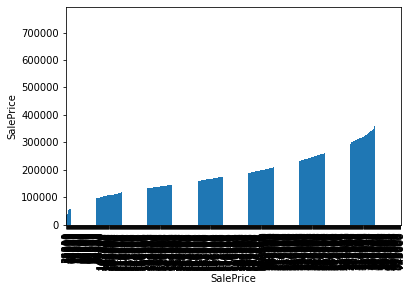

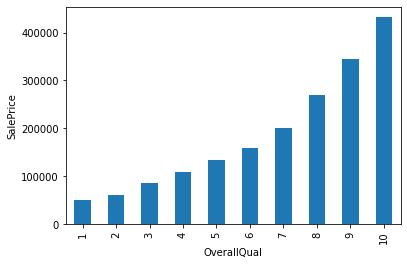

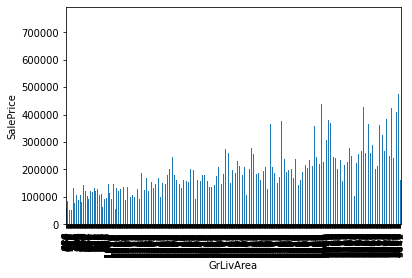

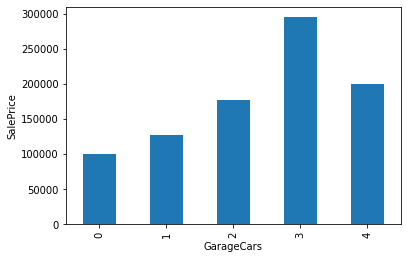

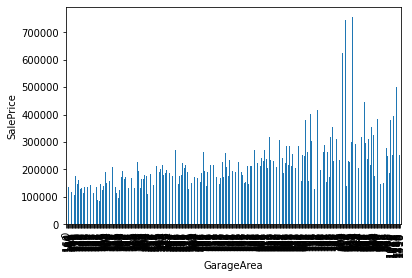

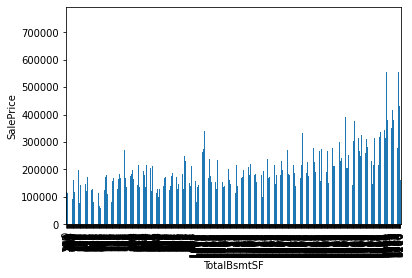

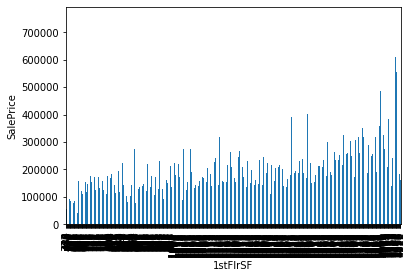

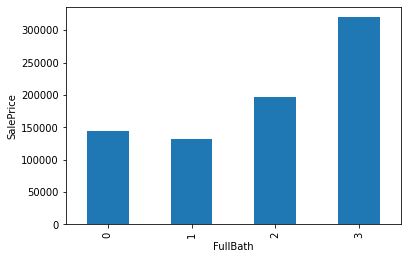

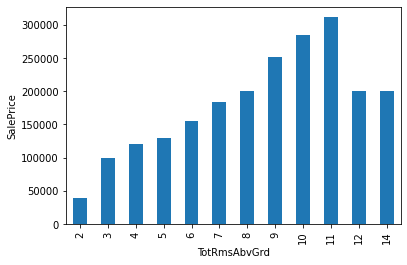

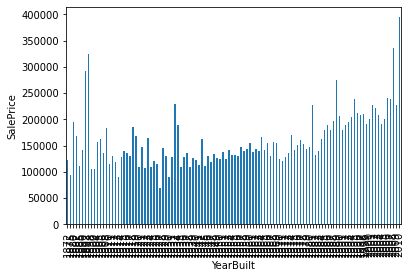

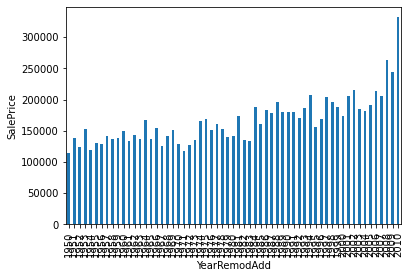

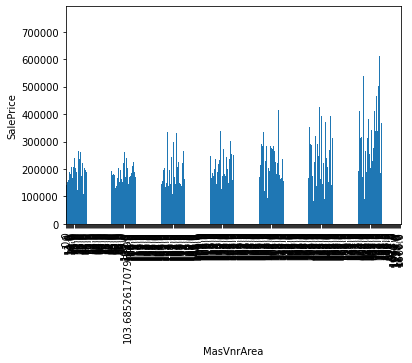

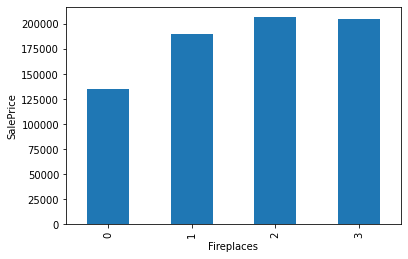

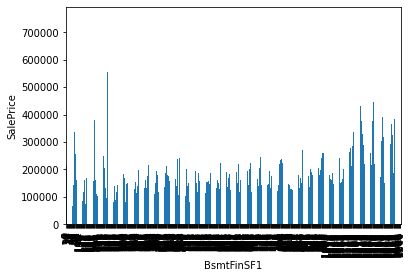

In [18]:
for feature in final_features:
    dataa=data.copy()
    dataa.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.show()

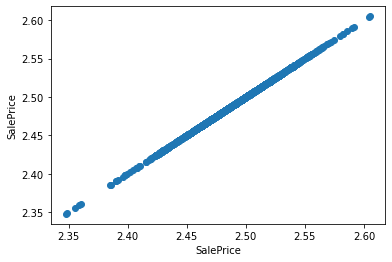

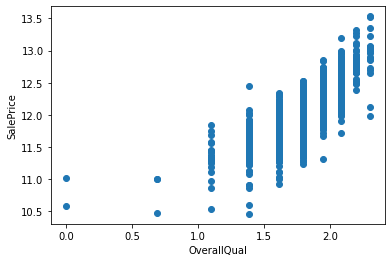

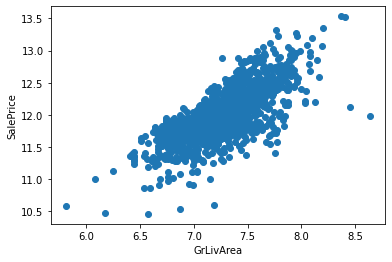

C:\Users\LENOVO\anaconda3\envs\tensor\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


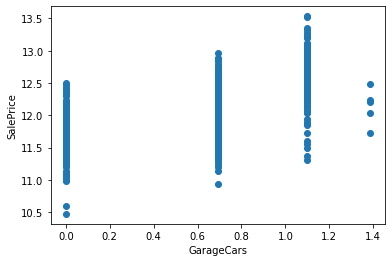

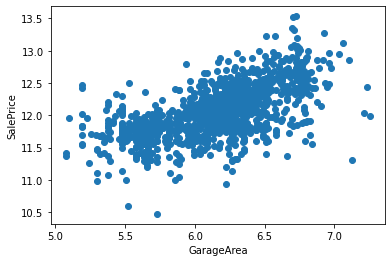

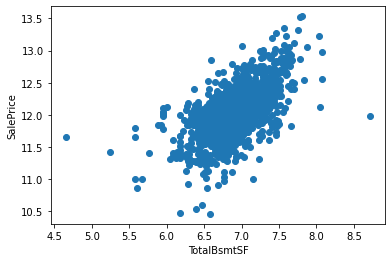

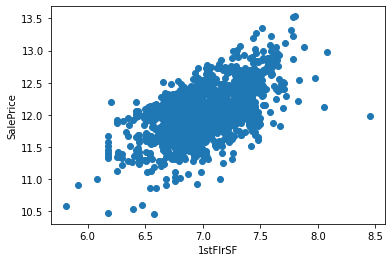

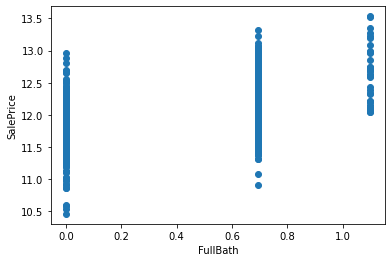

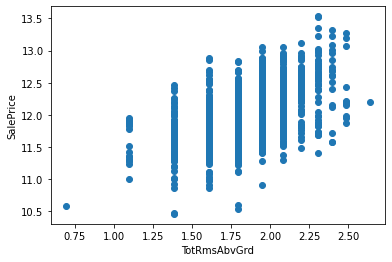

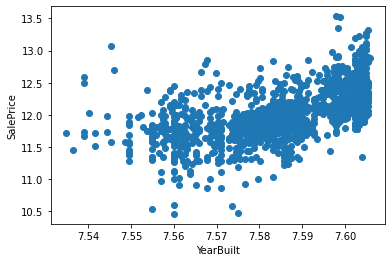

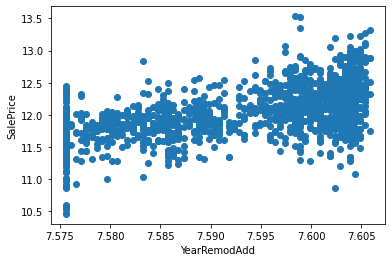

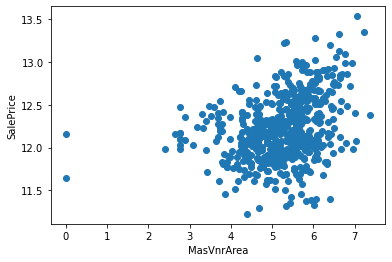

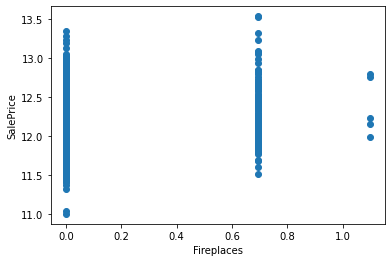

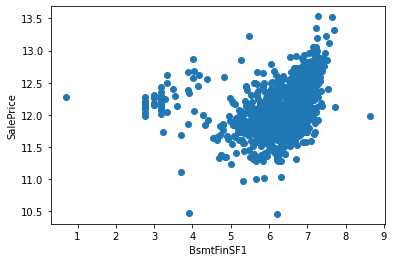

In [19]:
for feature in final_features:
    dataaa = data.copy()
    dataaa[feature] = np.log(dataaa[feature])
    dataaa['SalePrice'] = np.log(dataaa['SalePrice'])
    plt.scatter(dataaa[feature],dataaa['SalePrice'])
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.show()
         

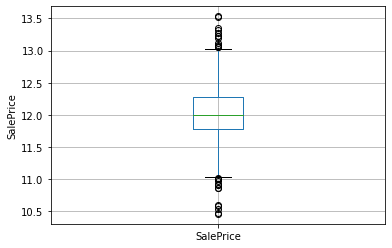

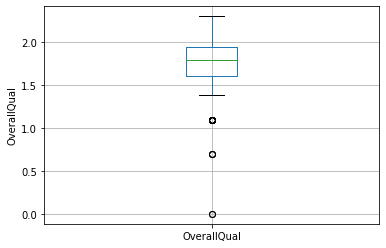

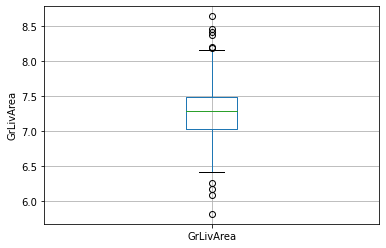

C:\Users\LENOVO\anaconda3\envs\tensor\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


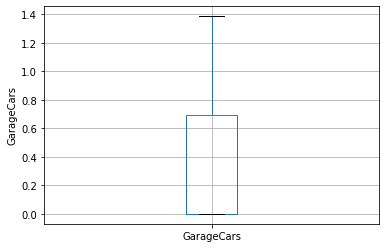

C:\Users\LENOVO\anaconda3\envs\tensor\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


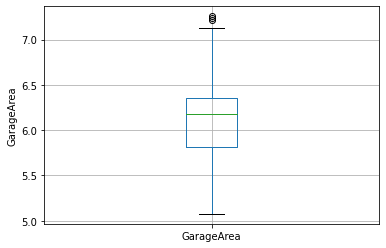

C:\Users\LENOVO\anaconda3\envs\tensor\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


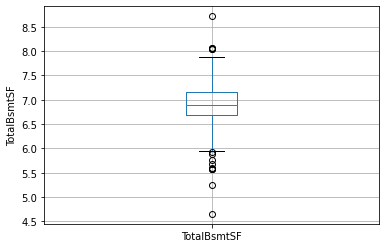

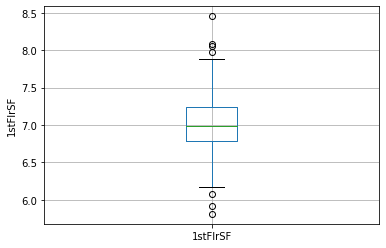

C:\Users\LENOVO\anaconda3\envs\tensor\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


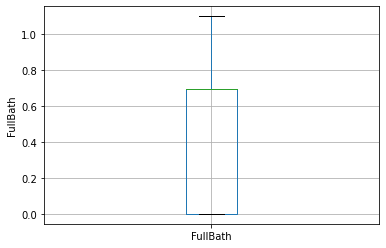

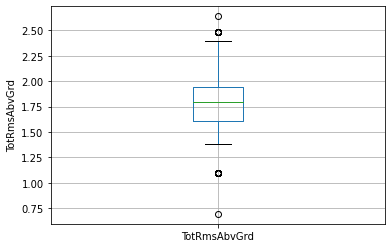

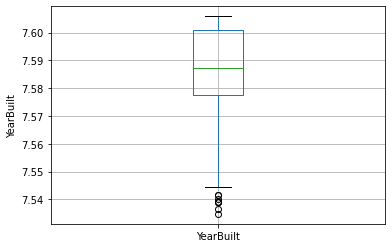

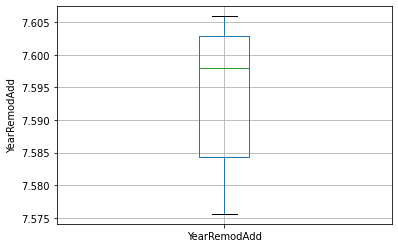

C:\Users\LENOVO\anaconda3\envs\tensor\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\LENOVO\anaconda3\envs\tensor\lib\site-packages\matplotlib\cbook\__init__.py:1129: RuntimeWarning: invalid value encountered in double_scalars
  notch_max = med + 1.57 * iqr / np.sqrt(N)


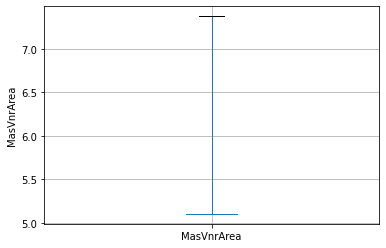

C:\Users\LENOVO\anaconda3\envs\tensor\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


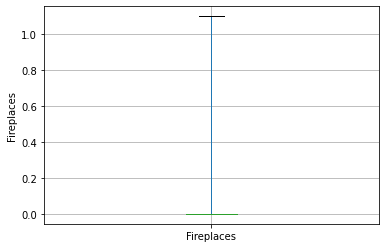

C:\Users\LENOVO\anaconda3\envs\tensor\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


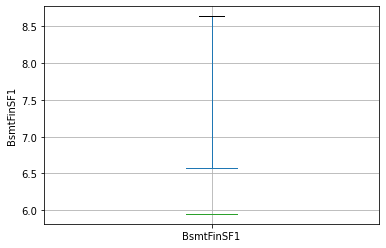

In [20]:
for feature in final_features:
    datum = data.copy()
    datum[feature] = np.log(datum[feature])
    datum.boxplot(column=feature)
    plt.ylabel(feature)
    plt.show()

# Preparing to train our data

In [21]:
training_X = data.copy()
training_X.drop(['SalePrice'],inplace=True,axis=1)
training_X

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,MasVnrArea,Fireplaces,BsmtFinSF1
0,7,1710,2,548,856,856,2,8,2003,2003,196.0,0,706
1,6,1262,2,460,1262,1262,2,6,1976,1976,0.0,1,978
2,7,1786,2,608,920,920,2,6,2001,2002,162.0,1,486
3,7,1717,3,642,756,961,1,7,1915,1970,0.0,1,216
4,8,2198,3,836,1145,1145,2,9,2000,2000,350.0,1,655
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,6,1647,2,460,953,953,2,7,1999,2000,0.0,1,0
1456,6,2073,2,500,1542,2073,2,7,1978,1988,119.0,2,790
1457,7,2340,1,252,1152,1188,2,9,1941,2006,0.0,2,275
1458,5,1078,1,240,1078,1078,1,5,1950,1996,0.0,0,49


In [22]:
training_Y = data['SalePrice']
training_Y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(training_X,training_Y,test_size=0.1,random_state=42)

In [24]:
X_train.shape,y_train.shape

((1314, 13), (1314,))

# Linear Regression

In [25]:
from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()
linear_regressor.fit(X_train,y_train)

LinearRegression()

In [26]:
predict_from_LR = linear_regressor.predict(X_test)

In [27]:
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse, accuracy_score

def metrics_for_algo(testing,pred_algo):
    print("---- Linear Regression - Model Evaluation ----")
    print("Mean Absolute Error: {}".format(mae(testing, pred_algo)))
    print("Mean Squared Error: {}".format(mse(testing, pred_algo)))
    print("Root Mean Squared Error: {}".format(np.sqrt(mse(testing, pred_algo))))

In [28]:
metrics_for_algo(y_test, predict_from_LR)

---- Linear Regression - Model Evaluation ----
Mean Absolute Error: 23649.138233566217
Mean Squared Error: 1646202660.1465163
Root Mean Squared Error: 40573.42307652284


# Decission Tree

In [29]:
from sklearn.tree import DecisionTreeRegressor
decision_regressor = DecisionTreeRegressor()
decision_regressor.fit(X_train,y_train)

DecisionTreeRegressor()

In [30]:
predict_from_DT = decision_regressor.predict(X_test)

In [31]:
metrics_for_algo(y_test,predict_from_DT)

---- Linear Regression - Model Evaluation ----
Mean Absolute Error: 26019.438356164384
Mean Squared Error: 2470745938.9863014
Root Mean Squared Error: 49706.598545729335


# Random Forest

In [32]:
from sklearn.ensemble import RandomForestRegressor
random_regressor = RandomForestRegressor()
random_regressor.fit(X_train,y_train)

RandomForestRegressor()

In [33]:
predict_from_RF = decision_regressor.predict(X_test)

In [34]:
metrics_for_algo(y_test,predict_from_RF)

---- Linear Regression - Model Evaluation ----
Mean Absolute Error: 26019.438356164384
Mean Squared Error: 2470745938.9863014
Root Mean Squared Error: 49706.598545729335


# Adaboost

In [35]:
from sklearn.ensemble import AdaBoostRegressor

In [36]:
def adaboost_testing(esti):
    print('The value of n_estimator is {}'.format(esti))
    adb = AdaBoostRegressor(base_estimator=decision_regressor, n_estimators=esti,random_state=42)
    adb.fit(X_train, y_train)
    
    predict_from_AB = adb.predict(X_test)
    
    metrics_for_algo(y_test,predict_from_AB)
    print('_______________________')

In [37]:
list_of_n_esti = [n for n in range(50, 150,5)]
for n in list_of_n_esti:
    adaboost_testing(n)

The value of n_estimator is 50
---- Linear Regression - Model Evaluation ----
Mean Absolute Error: 16268.869863013699
Mean Squared Error: 718404217.5684931
Root Mean Squared Error: 26803.063585502558
_______________________
The value of n_estimator is 55
---- Linear Regression - Model Evaluation ----
Mean Absolute Error: 16205.623287671233
Mean Squared Error: 724538985.4452055
Root Mean Squared Error: 26917.261848954946
_______________________
The value of n_estimator is 60
---- Linear Regression - Model Evaluation ----
Mean Absolute Error: 16228.945205479453
Mean Squared Error: 716744725.4063928
Root Mean Squared Error: 26772.088551444635
_______________________
The value of n_estimator is 65
---- Linear Regression - Model Evaluation ----
Mean Absolute Error: 16422.054794520547
Mean Squared Error: 721711967.5068493
Root Mean Squared Error: 26864.697420720175
_______________________
The value of n_estimator is 70
---- Linear Regression - Model Evaluation ----
Mean Absolute Error: 16104

We're choosing Adaboost with decision regressor as our base estimator

In [38]:
adb = AdaBoostRegressor(base_estimator=decision_regressor, n_estimators=70,random_state=42)
adb.fit(X_train, y_train)

predict_from_AB = adb.predict(X_test)

metrics_for_algo(y_test,predict_from_AB)

---- Linear Regression - Model Evaluation ----
Mean Absolute Error: 16104.527397260274
Mean Squared Error: 705205883.3584476
Root Mean Squared Error: 26555.71281962598


In [39]:
y_test[:5]

892     154500
1105    325000
413     115000
522     159000
1036    315500
Name: SalePrice, dtype: int64

In [40]:
predict_from_AB[:5]

array([142000., 313000., 112500., 160000., 285000.])

## Making predictions on test data

In [41]:
test_data =  pd.read_csv("test.csv")
test_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [42]:
test_df = test_data.copy()
final_features.remove('SalePrice')
test_df = test_df[final_features]
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OverallQual   1459 non-null   int64  
 1   GrLivArea     1459 non-null   int64  
 2   GarageCars    1458 non-null   float64
 3   GarageArea    1458 non-null   float64
 4   TotalBsmtSF   1458 non-null   float64
 5   1stFlrSF      1459 non-null   int64  
 6   FullBath      1459 non-null   int64  
 7   TotRmsAbvGrd  1459 non-null   int64  
 8   YearBuilt     1459 non-null   int64  
 9   YearRemodAdd  1459 non-null   int64  
 10  MasVnrArea    1444 non-null   float64
 11  Fireplaces    1459 non-null   int64  
 12  BsmtFinSF1    1458 non-null   float64
dtypes: float64(5), int64(8)
memory usage: 148.3 KB


#### Replacing missing values with respective feature's mean value

In [43]:
for i in final_features:
    test_df[i].fillna(test_df[i].mean(),inplace=True)

In [44]:
for feature in final_features:
    print(feature,'has', test_df[feature].isnull().sum(),'missing values')

OverallQual has 0 missing values
GrLivArea has 0 missing values
GarageCars has 0 missing values
GarageArea has 0 missing values
TotalBsmtSF has 0 missing values
1stFlrSF has 0 missing values
FullBath has 0 missing values
TotRmsAbvGrd has 0 missing values
YearBuilt has 0 missing values
YearRemodAdd has 0 missing values
MasVnrArea has 0 missing values
Fireplaces has 0 missing values
BsmtFinSF1 has 0 missing values


In [45]:
test_df=test_df.astype('int64')
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   OverallQual   1459 non-null   int64
 1   GrLivArea     1459 non-null   int64
 2   GarageCars    1459 non-null   int64
 3   GarageArea    1459 non-null   int64
 4   TotalBsmtSF   1459 non-null   int64
 5   1stFlrSF      1459 non-null   int64
 6   FullBath      1459 non-null   int64
 7   TotRmsAbvGrd  1459 non-null   int64
 8   YearBuilt     1459 non-null   int64
 9   YearRemodAdd  1459 non-null   int64
 10  MasVnrArea    1459 non-null   int64
 11  Fireplaces    1459 non-null   int64
 12  BsmtFinSF1    1459 non-null   int64
dtypes: int64(13)
memory usage: 148.3 KB


In [46]:
test_pred = adb.predict(test_df)
test_pred

array([123000., 147500., 183200., ..., 162000., 119900., 233000.])